#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

#### Reading dataset

In [2]:
df=pd.read_csv(r"C:\Users\rakhi\OneDrive\Desktop\MobileTrain.csv")

In [3]:
#first five rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#last five rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


#### Data description

In [5]:
df.shape

(2000, 21)

There are 2000 rows and 21 columns.

In [6]:
#datatypes of each column
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
#unique values in each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [8]:
#statistical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


#### Missing value handling

In [9]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values.

#### Duplicate handling

In [10]:
df.duplicated().any()

False

There are no duplicates.

#### Outlier handling

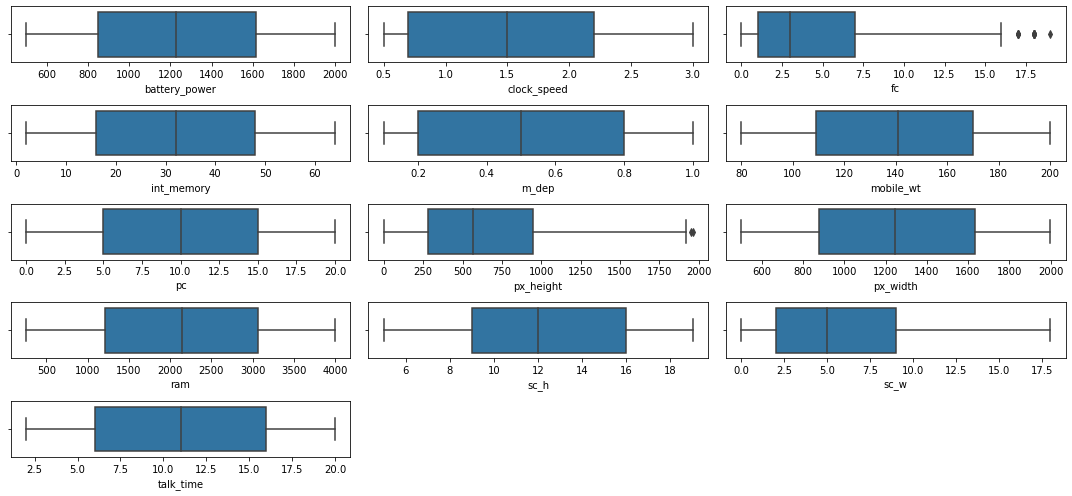

In [20]:
num_col= ['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
plt.figure(figsize=(15, 7))
for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[num_col[i]],orient='v')
    plt.tight_layout()

There are outliers in the columns 'fc' and 'px_height'. Since these are genuine values we need not replace or remove it.

### EDA

#### Pie chart

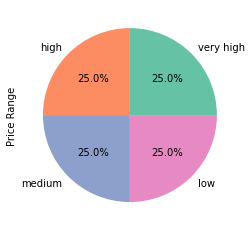

In [35]:
labels=['very high','high','medium','low']
plt.figure(figsize=(4,4))
color=sns.color_palette("Set2")
df['price_range'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Price Range')
plt.show()

The dataset is balanced.

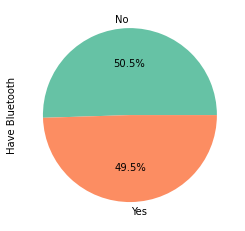

In [18]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
color=sns.color_palette("Set2")
df['blue'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Have Bluetooth')
plt.show()

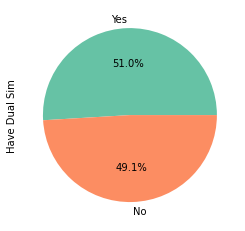

In [19]:
labels=['Yes','No']
plt.figure(figsize=(5,5))
color=sns.color_palette("Set2")
df['dual_sim'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Have Dual Sim')
plt.show()

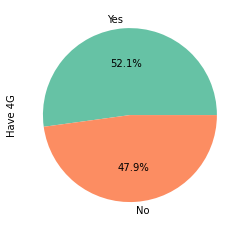

In [21]:
labels=['Yes','No']
plt.figure(figsize=(5,5))
color=sns.color_palette("Set2")
df['four_g'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Have 4G')
plt.show()

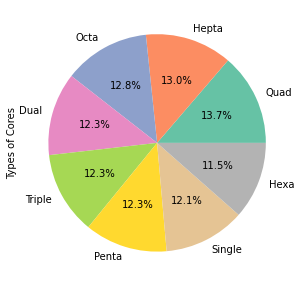

In [26]:
labels=['Quad','Hepta','Octa','Dual','Triple','Penta','Single','Hexa']
plt.figure(figsize=(5,5))
color=sns.color_palette("Set2")
df['n_cores'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(5,5))
plt.ylabel('Types of Cores')
plt.show()

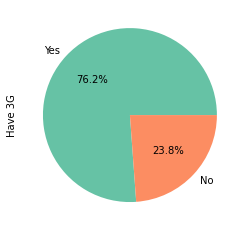

In [28]:
labels=['Yes','No']
plt.figure(figsize=(4,4))
color=sns.color_palette("Set2")
df['three_g'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Have 3G')
plt.show()

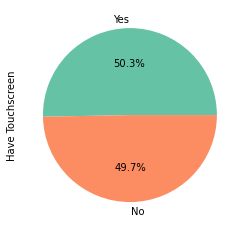

In [30]:
labels=['Yes','No']
plt.figure(figsize=(4,4))
color=sns.color_palette("Set2")
df['touch_screen'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Have Touchscreen')
plt.show()

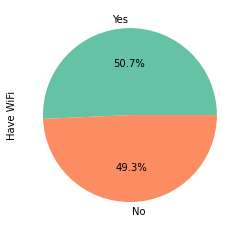

In [49]:
labels=['Yes','No']
plt.figure(figsize=(4,4))
color=sns.color_palette("Set2")
df['wifi'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Have WiFi')
plt.show()

* We can see that half of the phones have bluetooth, dual sim, 4G, touchscreen and wifi.
* Almost three-fourth of the phones have 3G.
* The different types of cores spread out evenly.

#### Countplot

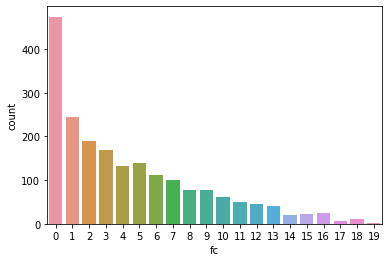

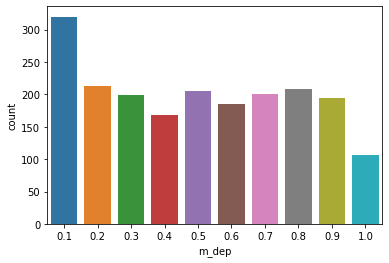

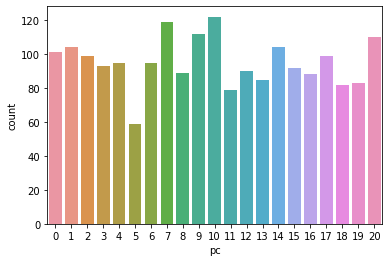

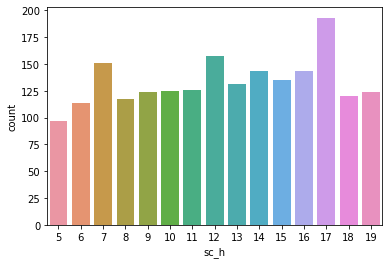

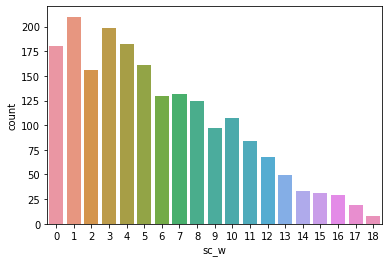

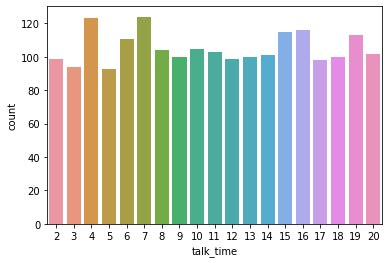

In [51]:
for i in num_col:
    if (df[i].nunique())<=25:
        sns.countplot(x=df[i])
        plt.show()

* Majority of phones in this dataset have a front camera. Only a quarter of the phone in this dataset doesn't have front camera.
* Almost 6 % of phones in this dataset doens't have camera.
* Talktime is evenly spread out.

#### Histplot

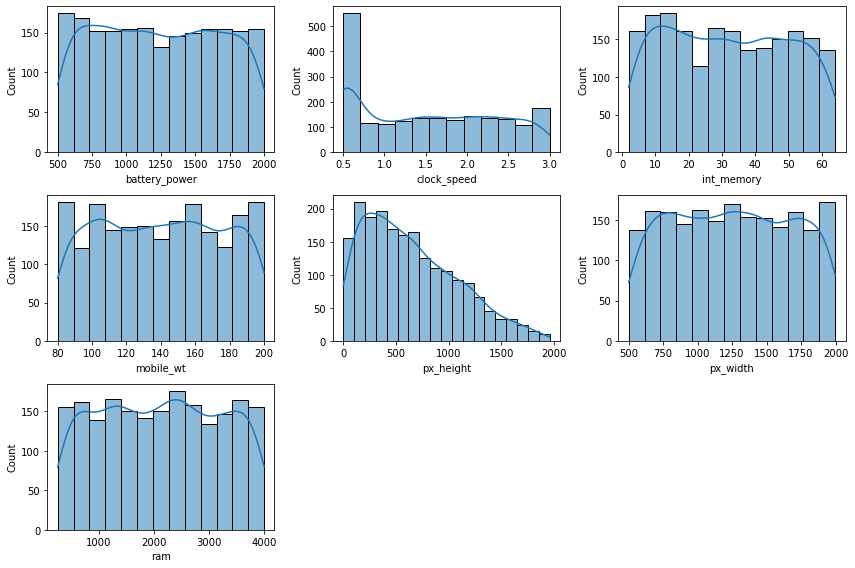

In [31]:
c=df[['battery_power','clock_speed','int_memory','mobile_wt','px_height','px_width','ram']]
plt.figure(figsize=(12,8))
for i, j in enumerate(c):
    plt.subplot(3,3, i+1)
    sns.histplot( df[j], kde = True)
plt.tight_layout()    

* the pixel height distribution is right skewed.
* others have multimodal distribution.

#### Line plot

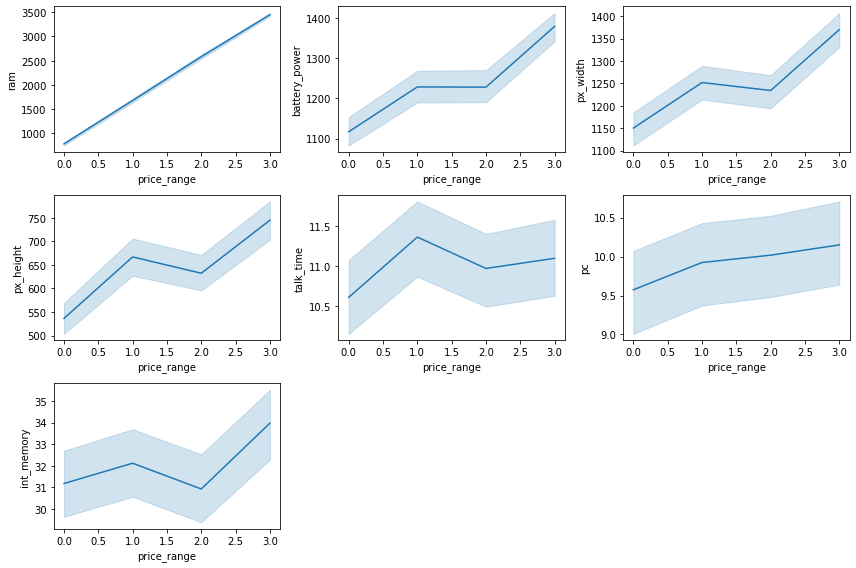

In [18]:
a=df[['ram','battery_power','px_width','px_height','talk_time','pc','int_memory']]
plt.figure(figsize=(12,8))
for i, j in enumerate(a):
    plt.subplot(3,3, i+1)
    sns.lineplot(y=df[j],x=df["price_range"])
plt.tight_layout()

* The higher the price range higher the average ram size.
* We can see that the higher the price range it tend to have a higher battery power except on the price range 1 to 2. It seems that from price range 1 to 2 there's no significance difference in the average  battery power 
* The price range of 2 and 3 seems to have products with almost same battery power.
* The price range of 0 has more products with lower pixel width and pixel height while the highest price range has more products with higher pixel width and pixel height.
* It seems that talk time doesn't really affect the price range.
* Higher price range has a higher megapixel primary camera.

#### Heatmap

<AxesSubplot:>

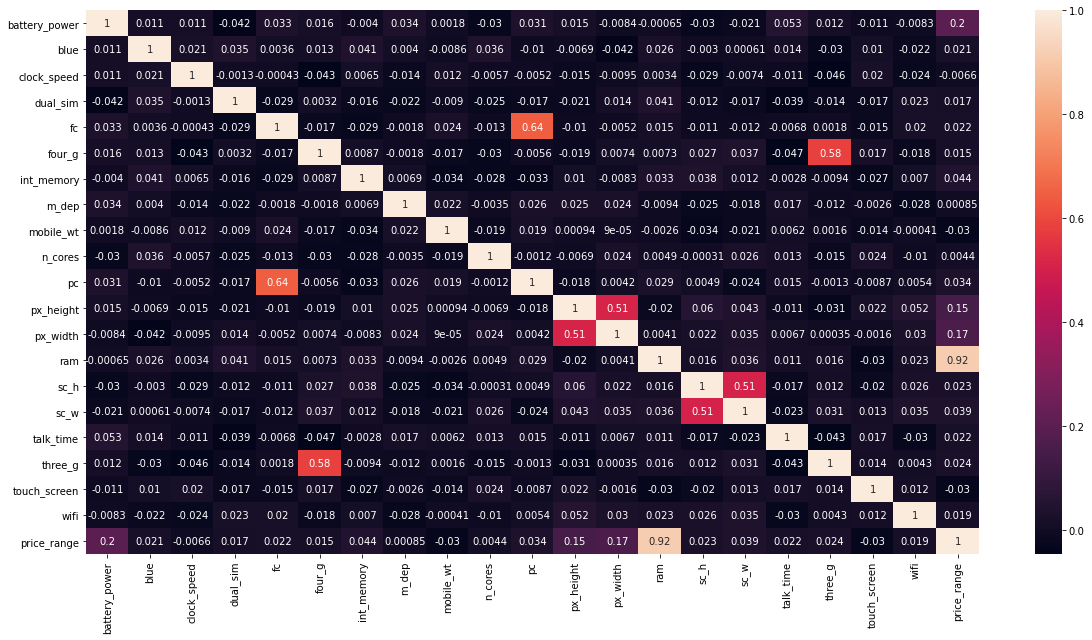

In [60]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

* Darker shades represent low correlation
* All features exibit low correlation with each other.
* 'ram' is highly correlated with price range.
* None of the features are negatively correlated.

#### Ranking all features

In [32]:
df1=df.copy()

In [33]:
#ranking each feature separately
df1["rank_by_battery"] = df1["battery_power"].rank(method="dense",ascending=False)
df1["rank_by_blueooth"] = df1["blue"].rank(method="dense",ascending=False)
df1["rank_by_clockspeed"] = df1["clock_speed"].rank(method="dense",ascending=False)
df1["rank_by_DualSIM"] = df1["dual_sim"].rank(method="dense",ascending=False)
df1["rank_by_fc"] = df1["fc"].rank(method="dense",ascending=False)
df1["rank_by_4G"] = df1["four_g"].rank(method="dense",ascending=False)
df1["rank_by_InternalMemory"] = df1["int_memory"].rank(method="dense",ascending=False)
df1["rank_by_mdep"] = df1["m_dep"].rank(method="dense",ascending=False)
df1["rank_by_weight"] = df1["mobile_wt"].rank(method="dense",ascending=True)
df1["rank_by_ncores"] = df1["n_cores"].rank(method="dense",ascending=False)
df1["rank_by_pc"] = df1["pc"].rank(method="dense",ascending=False)
df1["rank_by_height"] = df1["px_height"].rank(method="dense",ascending=False)
df1["rank_by_width"] = df1["px_width"].rank(method="dense",ascending=False)
df1["rank_by_ram"] = df1["ram"].rank(method="dense",ascending=False)
df1["rank_by_sch"] = df1["sc_h"].rank(method="dense",ascending=False)
df1["rank_by_scw"] = df1["sc_w"].rank(method="dense",ascending=False)
df1["rank_by_talktime"] = df1["talk_time"].rank(method="dense",ascending=False)
df1["rank_by_3G"] = df1["three_g"].rank(method="dense",ascending=False)
df1["rank_by_touchscreen"] = df1["touch_screen"].rank(method="dense",ascending=False)
df1["rank_by_wifi"] = df1["wifi"].rank(method="dense",ascending=False)
df1["rank_by_price"] = df1["price_range"].rank(method="dense")

In [34]:
#creating a new dataframe with ranks
RankedDataset = df1.iloc[:,21:]
RankedDataset.head()

,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,rank_by_ncores,...,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi,rank_by_price
0,839.0,2.0,9.0,2.0,19.0,2.0,58.0,5.0,109.0,7.0,...,1119.0,923.0,599.0,11.0,12.0,2.0,2.0,2.0,1.0,2.0
1,712.0,1.0,26.0,1.0,20.0,1.0,12.0,4.0,57.0,6.0,...,399.0,10.0,564.0,3.0,16.0,14.0,1.0,1.0,2.0,3.0
2,1046.0,1.0,26.0,1.0,18.0,1.0,24.0,2.0,66.0,4.0,...,175.0,208.0,578.0,9.0,17.0,12.0,1.0,1.0,2.0,3.0
3,1006.0,1.0,6.0,2.0,20.0,2.0,55.0,3.0,52.0,3.0,...,202.0,155.0,507.0,4.0,11.0,10.0,1.0,2.0,2.0,3.0
4,140.0,1.0,19.0,2.0,7.0,1.0,21.0,5.0,62.0,7.0,...,209.0,592.0,1063.0,12.0,17.0,6.0,1.0,1.0,2.0,2.0


In [35]:
#sorting rank dataset
df1.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,829.0,575.0,1205.0,6.0,12.0,18.0,1.0,1.0,2.0,1.0
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,1040.0,1087.0,1207.0,5.0,14.0,11.0,1.0,2.0,1.0,1.0
419,914,1,0.9,0,2,0,4,0.8,100,2,...,979.0,372.0,1320.0,9.0,12.0,16.0,1.0,1.0,2.0,1.0
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,997.0,881.0,1332.0,13.0,13.0,13.0,2.0,2.0,2.0,1.0
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,535.0,358.0,1549.0,6.0,15.0,4.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,920.0,714.0,65.0,3.0,7.0,12.0,1.0,1.0,1.0,4.0
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,941.0,33.0,217.0,6.0,14.0,9.0,1.0,1.0,2.0,4.0
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,586.0,841.0,6.0,3.0,5.0,13.0,1.0,1.0,1.0,4.0
956,862,0,2.3,0,9,1,6,0.1,107,8,...,452.0,19.0,239.0,11.0,15.0,12.0,1.0,1.0,1.0,4.0


For each price range, we can see the ranking of each features. This makes it decision making easier for the customers.